<a href="https://colab.research.google.com/github/dustinhodges/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/140_Hodges_Build1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
uploading two csv files, cleaning them and merging them
econ gives two indices of economic data 
we will later merge with data regarding MoMA's acquisition history
'''

import pandas as pd
import numpy as np
import seaborn as sns

urlop = "https://raw.githubusercontent.com/dustinhodges/DS-Unit-1-Sprint-4-Linear-Algebra/master/WID_Data_21102019-043838.csv"
one_percent = pd.read_csv(urlop, skiprows=1, sep=';') 
one_percent = one_percent.drop(['Percentile'], axis=1)

urlsp = "https://raw.githubusercontent.com/dustinhodges/DS-Unit-1-Sprint-4-Linear-Algebra/master/history.csv"
sp = pd.read_csv(urlsp, names=['Year', 'S&P return']) 

econ = pd.merge(sp, one_percent, how='outer', on='Year')
econ.columns = ["Year", "S&P return", "Top1% Income Share"]
print(econ.shape)
econ.head()


(93, 3)


,Year,S&P return,Top1% Income Share
0,2018,-4.38,NaN
1,2017,21.83,NaN
2,2016,11.96,NaN
3,2015,1.38,NaN
4,2014,13.69,0.202


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
urlMoMA = 'https://drive.google.com/open?id=1a9K4u4m-IQRKlRP2-vgi8Q7VWaPBZJHq'

In [0]:
fluff, id = urlMoMA.split('=')
print (id) # Verify that you have everything after '='

1a9K4u4m-IQRKlRP2-vgi8Q7VWaPBZJHq


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df3 = pd.read_csv('Filename.csv')
# Dataset is now stored in a Pandas Dataframe


In [0]:
'''
cleaning data purtaining to collection of Museum of Modern Art (MoMA)
dropping unnecessary columns, creating 'Acquisition Year' column
which will be the most importtant feature of our investigation
'''

MoMA = df3.drop(['Artwork ID', 'Catalogue', 'Diameter (cm)', 'Circumference (cm)', 
                'Height (cm)', 'Length (cm)', 'Width (cm)', 'Depth (cm)', 
               'Weight (kg)', 'Duration (s)', 'Title', 'Medium', 'Dimensions'], axis=1)
def first4(s):
    return str(s)[:4]
  
MoMA['Acquisition Year'] = MoMA['Acquisition Date'].apply(first4)
print(MoMA.shape)
MoMA.head()

(130262, 9)


,Artist ID,Name,Date,Acquisition Date,Credit,Department,Classification,Object Number,Acquisition Year
0,6210,Otto Wagner,1896,1996-04-09,Fractional and promised gift of Jo Carole and ...,Architecture & Design,Architecture,885.1996,1996
1,7470,Christian de Portzamparc,1987,1995-01-17,Gift of the architect in honor of Lily Auchinc...,Architecture & Design,Architecture,1.1995,1995
2,7605,Emil Hoppe,1903,1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Architecture & Design,Architecture,1.1997,1997
3,7056,Bernard Tschumi,1980,1995-01-17,Purchase and partial gift of the architect in ...,Architecture & Design,Architecture,2.1995,1995
4,7605,Emil Hoppe,1903,1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Architecture & Design,Architecture,2.1997,1997


In [0]:
'''
cleaning our new 'Acquisition Year' feature of Nan values and impossible values
converting str to int values
'''

MoMA = MoMA[MoMA['Acquisition Year'] != 'nan']
MoMA = MoMA[MoMA['Acquisition Year'] != '1216']
print(MoMA.shape)

def num(s):
    return pd.to_numeric(s)
  
MoMA['Acquisition Year'] = MoMA['Acquisition Year'].apply(num)
MoMA.head()

(124798, 9)


,Artist ID,Name,Date,Acquisition Date,Credit,Department,Classification,Object Number,Acquisition Year
0,6210,Otto Wagner,1896,1996-04-09,Fractional and promised gift of Jo Carole and ...,Architecture & Design,Architecture,885.1996,1996
1,7470,Christian de Portzamparc,1987,1995-01-17,Gift of the architect in honor of Lily Auchinc...,Architecture & Design,Architecture,1.1995,1995
2,7605,Emil Hoppe,1903,1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Architecture & Design,Architecture,1.1997,1997
3,7056,Bernard Tschumi,1980,1995-01-17,Purchase and partial gift of the architect in ...,Architecture & Design,Architecture,2.1995,1995
4,7605,Emil Hoppe,1903,1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Architecture & Design,Architecture,2.1997,1997


In [0]:
'''
combining three values within 'Department' feature 
and replacing with a general value
comparing relative sizes of now 6 Departments
'''

MoMA['Department'] = MoMA['Department'].str.replace('Film','Film, Performance, Fluxus')
MoMA['Department'] = MoMA['Department'].str.replace('Media and Performance Art','Film, Performance, Fluxus')
MoMA['Department'] = MoMA['Department'].str.replace('Fluxus Collection','Film, Performance, Fluxus')

MoMA['Department'].value_counts()

Prints & Illustrated Books    59073
Photography                   28733
Architecture & Design         14776
Drawings                      10991
Film, Performance, Fluxus      7422
Painting & Sculpture           3803
Name: Department, dtype: int64

In [0]:
'''
creating a crosstab of normalized values for MoMA acquisitions by Department
this will allow us to compare values across departments
for example 10 paintings has not the same weight as 10 photographs or 10 films
normalized we can compare proportions relative to entire Department collections
'''

Media_year = pd.crosstab(MoMA['Department'], MoMA['Acquisition Year'], normalize='index')
Media_year

Acquisition Year,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Department,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Architecture & Design,0.000000,0.000000,0.000000,0.000135,0.000000,0.003316,0.001557,0.006091,0.013332,0.001151,0.009272,0.004940,0.000677,0.005550,0.057187,0.004467,0.007241,0.002301,0.005076,0.008595,0.001963,0.006565,0.010422,0.004331,0.009136,0.007783,0.003113,0.014483,0.007241,0.012723,0.001083,0.007715,0.004061,0.002301,0.011437,0.006159,0.007174,0.009813,0.013535,0.013874,...,0.011708,0.004061,0.004602,0.009204,0.011234,0.006497,0.015363,0.006971,0.007580,0.004805,0.010152,0.005076,0.001895,0.010693,0.001963,0.004399,0.007377,0.008121,0.008933,0.013738,0.006632,0.008933,0.051232,0.029304,0.017934,0.002639,0.008392,0.007241,0.007038,0.020303,0.015295,0.014145,0.013062,0.009813,0.021183,0.049946,0.011167,0.057323,0.093733,0.028357
Drawings,0.000091,0.000182,0.000000,0.000364,0.000000,0.001729,0.027841,0.002457,0.002366,0.000182,0.007916,0.004822,0.016741,0.024111,0.002457,0.001820,0.007552,0.000637,0.007916,0.003002,0.002184,0.002457,0.001729,0.001456,0.006642,0.003457,0.005186,0.009007,0.003730,0.003366,0.000910,0.002911,0.003821,0.007097,0.020471,0.012192,0.007461,0.014102,0.020107,0.023929,...,0.012920,0.029661,0.009917,0.006733,0.009189,0.003730,0.009553,0.009826,0.015103,0.005459,0.004094,0.008643,0.007188,0.005641,0.005277,0.007916,0.002002,0.000819,0.004276,0.008552,0.005459,0.005095,0.008552,0.010008,0.029661,0.019198,0.007097,0.016377,0.250023,0.007734,0.017014,0.015922,0.015831,0.022200,0.021745,0.015194,0.008643,0.009189,0.010099,0.015376
"Film, Performance, Fluxus",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000539,0.000943,0.000539,0.001617,0.002425,0.001078,0.000135,0.000135,0.000000,0.000135,0.000000,0.000000,0.000269,0.000000,0.000000,0.000000,0.000000,0.000135,0.000404,0.000135,0.000404,0.000404,0.000000,0.000135,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000135,...,0.000943,0.000674,0.004850,0.002290,0.003368,0.002695,0.002290,0.008488,0.002021,0.008758,0.002290,0.005524,0.002560,0.003099,0.002695,0.003099,0.005255,0.009431,0.002021,0.000000,0.010105,0.005928,0.022231,0.014686,0.001886,0.040690,0.012935,0.005389,0.025869,0.005120,0.067502,0.339666,0.019941,0.009566,0.045810,0.110887,0.045540,0.023444,0.049178,0.052142
Painting & Sculpture,0.000000,0.001315,0.000526,0.000263,0.000526,0.005259,0.005785,0.006574,0.009466,0.004207,0.015514,0.005522,0.013148,0.020247,0.009729,0.004996,0.004733,0.002367,0.004996,0.005522,0.009729,0.007889,0.009992,0.008677,0.011044,0.009466,0.014462,0.017092,0.007100,0.013673,0.016566,0.014725,0.020773,0.009729,0.014988,0.016040,0.018407,0.015777,0.026295,0.011044,...,0.006311,0.009729,0.025506,0.006574,0.006837,0.007100,0.012622,0.007626,0.029976,0.007889,0.006311,0.004207,0.003681,0.011833,0.022877,0.011833,0.004470,0.019721,0.007100,0.020247,0.010518,0.012359,0.009203,0.011307,0.007626,0.008940,0.003681,0.012359,0.039705,0.008940,0.010781,0.012096,0.008414,0.035235,0.023666,0.012096,0.017881,0.011044,0.014199,0.016829
Photography,0.000000,0.000000,0.000000,0.000035,0.003167,0.000070,0.000835,0.000000,0.001984,0.002923,0.001775,0.004350,0.021265,0.007587,0.004455,0.003933,0.000000,0.001114,0.001253,0.000035,0.000000,0.003202,0.000000,0.000557,0.001775,0.001531,0.000139,0.002227,0.000905,0.000000,0.015731,0.003620,0.005255,0.005394,0.004420,0.020116,0.012320,0.005951,0.011833,0.190721,...,0.010337,0.008283,0.009118,0.006752,0.024432,0.010511,0.014409,0.010023,0.005986,0.010754,0.010267,0.006125,0.013086,0.008805,0.006717,

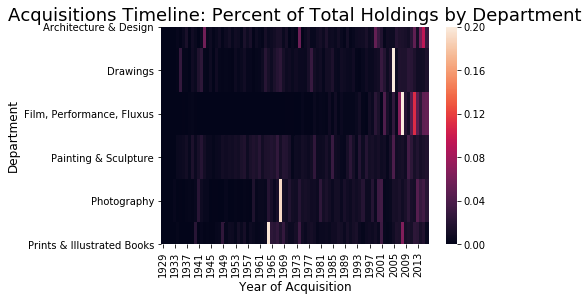

In [0]:
'''
plotting a heatmap from our crosstab of normalized numbers of works acquired by year
'''
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(Media_year,robust=True, vmax=.20, yticklabels=True)

plt.title('Acquisitions Timeline: Percent of Total Holdings by Department', fontsize = 18)
plt.xlabel('Year of Acquisition', fontsize = 12)
plt.ylabel('Department', fontsize = 12)
plt.show()

In [0]:
'''
creating a similar df from our previous crosstab 
but this time without normalizing the values
we will merge collection with econ 
to investigate possible correlations between 
the development of MoMA's collection and economic indices
'''

collection = pd.crosstab(MoMA['Department'], MoMA['Acquisition Year']).T
collection = collection.reset_index()
print(collection.shape)
collection.tail()

(88, 7)


Department,Acquisition Year,Architecture & Design,Drawings,"Film, Performance, Fluxus",Painting & Sculpture,Photography,Prints & Illustrated Books
83,2012,738,167,823,46,301,1387
84,2013,165,95,338,68,1263,1302
85,2014,847,101,174,42,810,701
86,2015,1385,111,365,54,976,1011
87,2016,419,169,387,64,596,266


In [0]:
'''
renaming Acquisition Year to Year in order to merge with econ
'''

collect = collection.rename({'Department': 'index', 'Acquisition Year': 'Year'}, axis=1)
collect.head()

Department,Year,Architecture & Design,Drawings,"Film, Performance, Fluxus",Painting & Sculpture,Photography,Prints & Illustrated Books
0,1929,0,1,0,0,0,8
1,1930,0,2,0,5,0,1
2,1931,0,0,0,2,0,1
3,1932,2,4,0,1,1,10
4,1933,0,0,0,2,91,2


In [0]:
'''
merge collection with econ to create acquisition dataframe
'''

acquisition = pd.merge(collect, econ, how='outer', on='Year')
acquisition = acquisition.drop([88, 89, 90, 91, 92])

print(acquisition.shape)
acquisition.head()

(88, 9)


,Year,Architecture & Design,Drawings,"Film, Performance, Fluxus",Painting & Sculpture,Photography,Prints & Illustrated Books,S&P return,Top1% Income Share
0,1929,0.0,1.0,0.0,0.0,0.0,8.0,-8.42,0.2116
1,1930,0.0,2.0,0.0,5.0,0.0,1.0,-24.90,0.1809
2,1931,0.0,0.0,0.0,2.0,0.0,1.0,-43.34,0.1503
3,1932,2.0,4.0,0.0,1.0,1.0,10.0,-8.19,0.1391
4,1933,0.0,0.0,0.0,2.0,91.0,2.0,53.99,0.1516


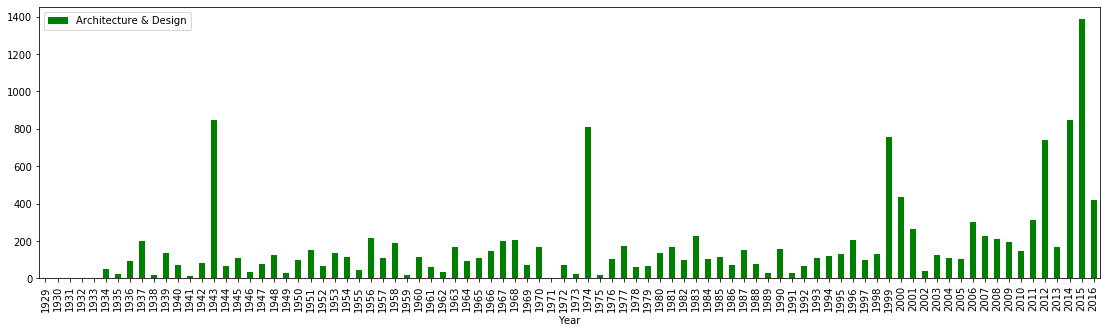

In [0]:
'''
plot a bar chart timeline for each of 6 Departments of the collection
and also the two economic indices for same timeframe
see if anything interesting emerges visually
'''

acquisition.plot('Year','Architecture & Design', kind='bar', color='green', figsize=(19,5));

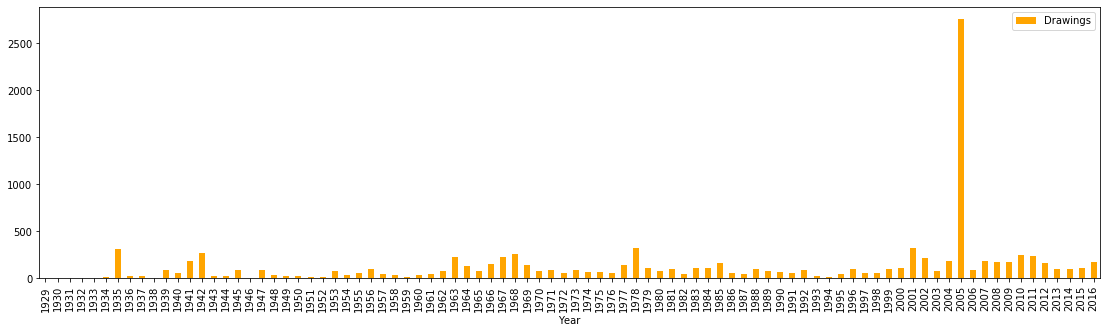

In [0]:
acquisition.plot('Year','Drawings', kind='bar', color='orange', figsize=(19,5));

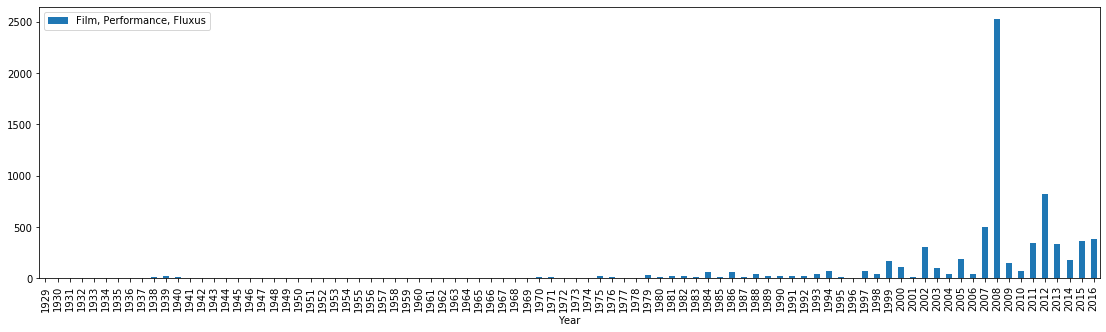

In [0]:
acquisition.plot('Year','Film, Performance, Fluxus', kind='bar', figsize=(19, 5));

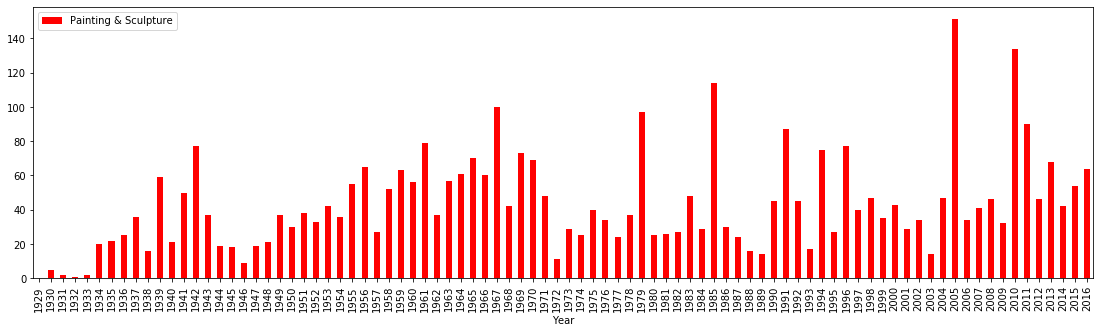

In [0]:
acquisition.plot('Year','Painting & Sculpture', kind='bar', color='red', figsize=(19,5));

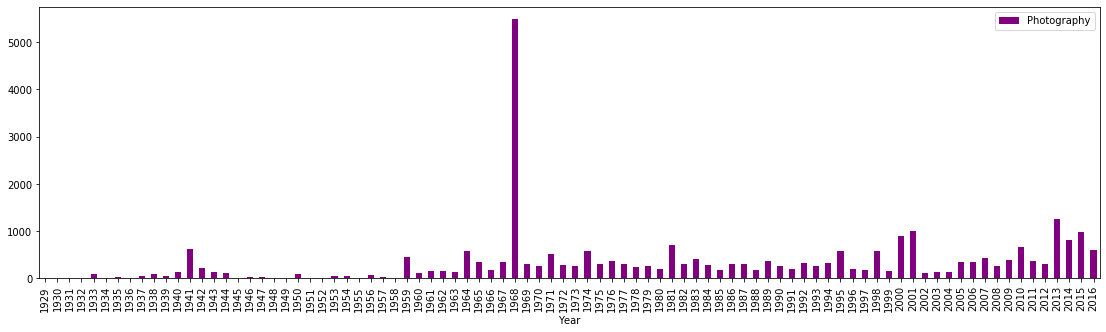

In [0]:
acquisition.plot('Year','Photography', kind='bar', color='purple', figsize=(19,5));

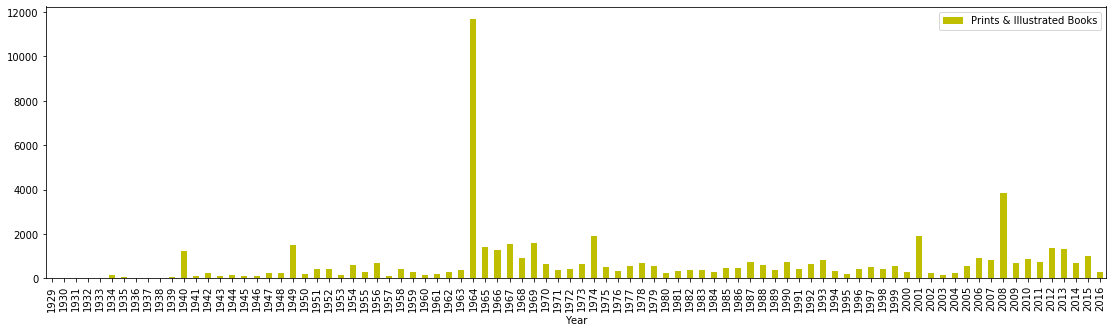

In [0]:
acquisition.plot('Year','Prints & Illustrated Books', kind='bar', color='y', figsize=(19,5));

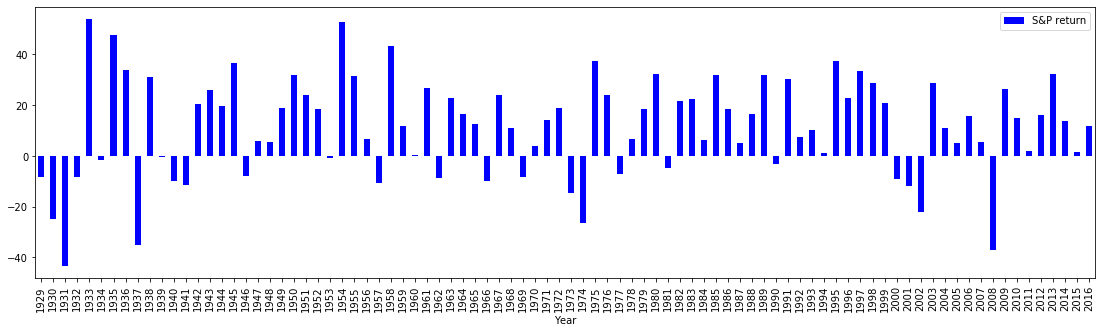

In [0]:
acquisition.plot('Year','S&P return', kind='bar', color='b', figsize=(19,5));

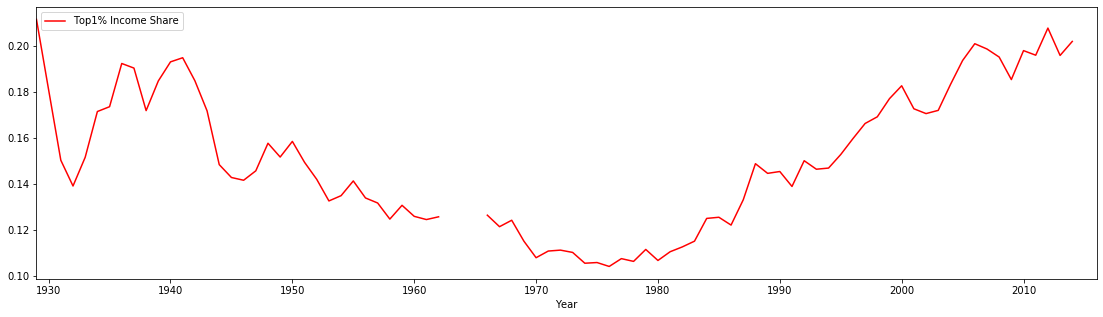

In [0]:
acquisition.plot('Year','Top1% Income Share', kind='line', color='r', figsize=(19,5));

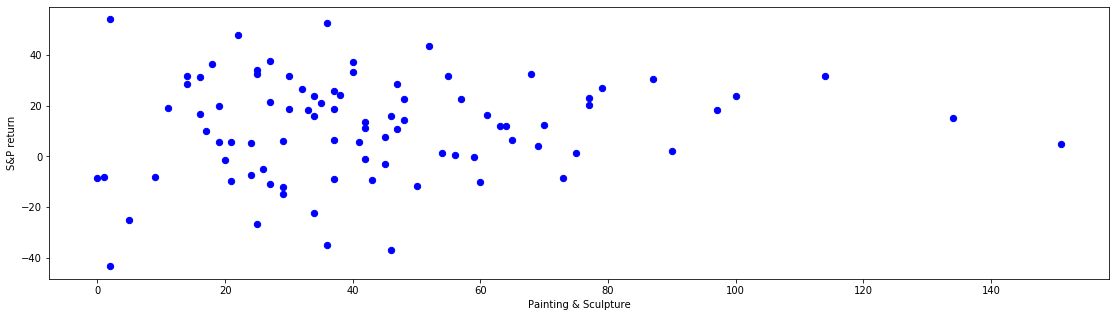

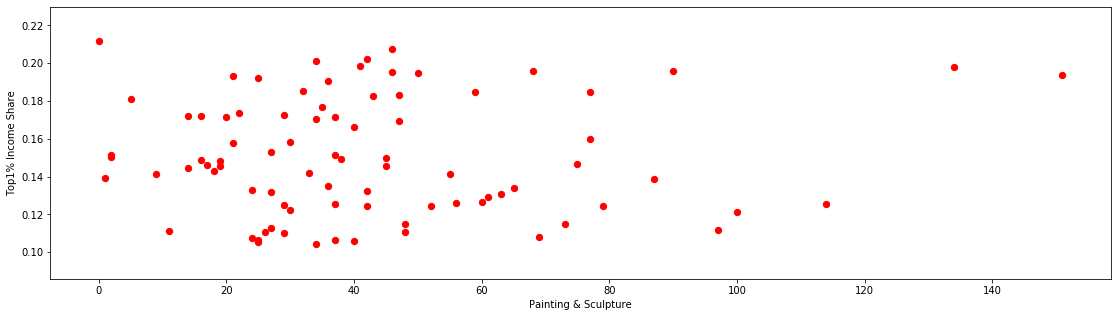

In [0]:
'''
make a scatter plot comparing the department most similar to economic data
see that very little correlation appears upon inpection of the scatter plots
'''

acquisition.plot('Painting & Sculpture','S&P return', figsize=(19, 5), s=40, kind='scatter', color='b')
acquisition.plot('Painting & Sculpture','Top1% Income Share', figsize=(19,5), s=40, kind='scatter', color='r');

In [0]:
'''
compare statistical values
'''

acquisition.describe()

,Year,Architecture & Design,Drawings,"Film, Performance, Fluxus",Painting & Sculpture,Photography,Prints & Illustrated Books,S&P return,Top1% Income Share
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,84.000000
mean,1972.500000,167.909091,124.897727,84.340909,43.215909,326.511364,671.284091,11.303182,0.150658
std,25.547342,223.189916,293.436517,292.405516,28.068655,611.286151,1314.373440,19.730369,0.030773
min,1929.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-43.340000,0.104100
25%,1950.750000,63.000000,37.750000,0.000000,25.000000,79.000000,213.250000,-1.102500,0.125375
50%,1972.500000,107.000000,78.500000,7.500000,37.000000,228.000000,402.000000,13.070000,0.146650
75%,1994.250000,170.750000,134.500000,39.250000,56.250000,355.000000,692.000000,24.490000,0.174475
max,2016.000000,1385.000000,2748.000000,2521.000000,151.000000,5480.000000,11667.000000,53.990000,0.211600


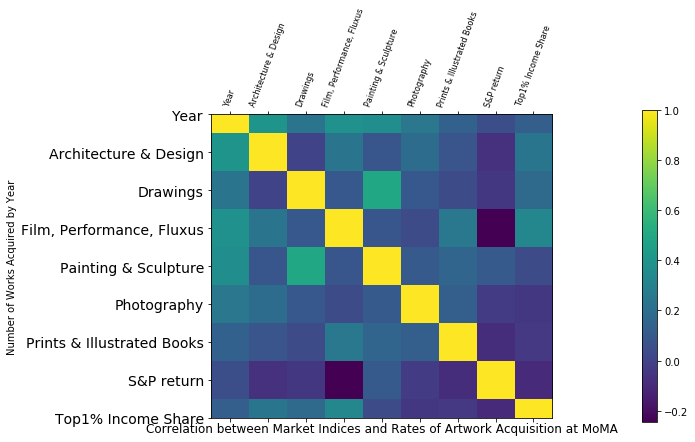

In [0]:
'''
plot a correlation matrix heatmap
'''

import matplotlib.pyplot as plt

f = plt.figure(figsize=(8, 8))
plt.matshow(acquisition.corr(), fignum=f.number)
plt.xticks(range(acquisition.shape[1]), acquisition.columns, fontsize=8, rotation=70)
plt.yticks(range(acquisition.shape[1]), acquisition.columns, fontsize=14)
plt.colorbar(fraction=0.035, pad=0.2)
plt.ylabel('Number of Works Acquired by Year')
plt.xlabel('Correlation between Market Indices and Rates of Artwork Acquisition at MoMA', fontsize=12)
#cb.ax.tick_params(labelsize=10, size=5)
#plt.style.background_gradient(cmap='coolwarm')
#plt.title('Correlation Matrix', fontsize=10, loc='left');
plt.show()

In [0]:
'''
again, this time with correlation coefficient values
'''

corr = acquisition.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Architecture & Design,Drawings,"Film, Performance, Fluxus",Painting & Sculpture,Photography,Prints & Illustrated Books,S&P return,Top1% Income Share
Year,1,0.400261,0.233729,0.385844,0.363824,0.247115,0.142542,0.052776,0.131768
Architecture & Design,0.400261,1,0.00541053,0.235013,0.0861664,0.193631,0.0837508,-0.0684974,0.239976
Drawings,0.233729,0.00541053,1,0.0968533,0.495498,0.0966031,0.0429785,-0.0458712,0.18434
"Film, Performance, Fluxus",0.385844,0.235013,0.0968533,1,0.0865441,0.0387344,0.253309,-0.246251,0.33064
Painting & Sculpture,0.363824,0.0861664,0.495498,0.0865441,1,0.108859,0.15849,0.10765,0.0368082
Photography,0.247115,0.193631,0.0966031,0.0387344,0.108859,1,0.129789,-0.0229531,-0.0466097
Prints & Illustrated Books,0.142542,0.0837508,0.0429785,0.253309,0.15849,0.129789,1,-0.0834495,-0.0417476
S&P return,0.052776,-0.0684974,-0.0458712,-0.246251,0.10765,-0.0229531,-0.0834495,1,-0.094013
Top1% Income Share,0.131768,0.239976,0.18434,0.33064,0.0368082,-0.0466097,-0.0417476,-0.094013,1


In [0]:
'''
See what is responsible for massive jumps in donations 
to 4 particular Departments in 4 particular years:

1964: Prints
1968: Photography
2005: Drawings
2008: Fluxus

Interestingly, all four years are dominated by single donors. 
What's the story???
'''

condition = (MoMA['Acquisition Year'] == 1964) & (MoMA['Department'] == 'Prints & Illustrated Books')
sixty_four = MoMA.loc[condition]
print(sixty_four.shape)
print(sixty_four['Credit'].value_counts()[:10])


(11667, 9)
The Louis E. Stern Collection                                                                   10918
Gift of Peter H. Deitsch                                                                           84
Gift of the Celeste and Armand Bartos Foundation                                                   76
Gift of the author, Walasse Ting, the editor, Sam Francis, and the publisher, E. W. Kornfeld       63
Abby Aldrich Rockefeller Fund                                                                      58
Gift of Mrs. William Gropper                                                                       51
Gift of G. David Thompson                                                                          31
Given anonymously                                                                                  17
Inter-American Fund                                                                                16
Gift of the artist                                                     

In [0]:
condition = (MoMA['Acquisition Year'] == 1968) & (MoMA['Department'] == 'Photography') 
sixty_eight = MoMA.loc[condition]
print(sixty_eight.shape)
print(sixty_eight['Credit'].value_counts()[:10])

(5480, 9)
Abbott-Levy Collection. Partial gift of Shirley C. Burden        4889
Gift of David H. McAlpin                                          262
Gift of the photographer                                           73
The Ben Schultz Memorial Collection. Gift of the photographer      50
Benjamin Zeller Memorial Fund                                      48
Purchase                                                           48
Gift of Willard Van Dyke                                           14
Mr. and Mrs. John Spencer Fund                                     11
David H. McAlpin Fund                                              10
Gift of Mrs. Nickolas Muray                                         8
Name: Credit, dtype: int64


In [0]:
condition = (MoMA['Acquisition Year'] == 2005) & (MoMA['Department'] == 'Drawings')
twenty_five = MoMA.loc[condition]
print(twenty_five.shape)
print(twenty_five['Credit'].value_counts()[:10])

(2748, 9)
The Judith Rothschild Foundation Contemporary Drawings Collection Gift                                                                              2473
The Judith Rothschild Foundation Contemporary Drawings Collection Gift (purchase, and gift, in part, of The Eileen and Michael Cohen Collection)     104
Gift of Edward R. Broida                                                                                                                              54
Purchase                                                                                                                                              47
Gift of David Teiger                                                                                                                                  12
Gift of Martin and Rebecca Eisenberg                                                                                                                   7
The Judith Rothschild Foundation Contemporary Drawings Collection Gift (

In [0]:
condition = (MoMA['Acquisition Year'] == 2008) & (MoMA['Department'] == 'Film, Performance, Fluxus')
twenty_eight = MoMA.loc[condition]
print(twenty_eight.shape)
print(twenty_eight['Credit'].value_counts()[:10])

(2521, 9)
The Gilbert and Lila Silverman Fluxus Collection Gift                                                                     2114
Gift of the artist                                                                                                         110
Gift of IFC Films                                                                                                           56
Gift of the David Bowie Archive                                                                                             36
Gift of Jerry I. Speyer and Katherine G. Farley, Anna Marie and Robert F. Shapiro, and Marie-Josée and Henry R. Kravis      35
The Gilbert and Lila Silverman Fluxus Collection Archive, The Museum of Modern Art Archive                                  21
Gift of Jerry I. Speyer and Katherine G. Farley                                                                             17
Fund for the Twenty-First Century                                                                    